## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [4]:
A = np.array([[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]])

b = np.array([[12],
     [10],
     [-1]])

x0 = np.array([[1],
     [1],
     [1]])

A, b = map(np.asarray, (A, b))

def f(A,b,x0):
    fx = np.dot(A,x0) + b
    return fx

def solve(A,b,x0):
    xt = x0
    xt_plus_1 = f(A,b,x0)
    
    while np.linalg.norm(xt_plus_1 - xt) > 0.0001:
        xt = xt_plus_1
        xt_plus_1 = f(A,b,xt)
    return xt_plus_1

sol = solve(A,b,x0)
check = np.dot(A,sol) + b - sol
print(sol)

[[ -0.89542378]
 [ 13.3432489 ]
 [ 45.64145938]]


The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [3]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

In [6]:
W = [1,2,3,4,5,6,7,8,9]
P = [0.1,0.2,0.2,0.2,0.1,0.05,0.05,0.05,0.05,]
w0 = 6.2
c = 5
B = 0.96

def f2(w0,W,c,B,P):
    m_set = [w0 for i in range(len(W))]
    in_set = [max(x,y) for x,y in zip(W,m_set)]
    fx = c*(1-B) + B*np.dot(in_set,P)
    return fx

def solve(w0,W,c,B,P):
    xt = w0
    xt_plus_1 = f2(w0,W,c,B,P)
    
    while np.linalg.norm(xt_plus_1 - xt) > 0.0001:
        xt = xt_plus_1
        xt_plus_1 = f2(xt,W,c,B,P)
    return xt_plus_1

K = solve(w0,W,c,B,P)
print(K)
print(f2(K,W,c,B,P))

7.47003371634
7.47010913092


#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

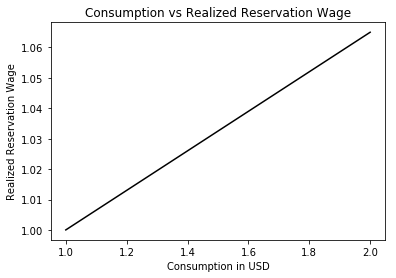

In [8]:
W = [0.5,1.0,1.5]
P = [0.2,0.2,0.4]
B = 0.96

def f(w0,W,c,B,P):
    m_set = [w0 for i in range(len(W))]
    in_set = [max(x,y) for x,y in zip(W,m_set)]
    fx = c*(1-B) + B*np.dot(in_set,P)
    return fx

def solve(w0,W,c,B,P):
    xt = w0
    xt_plus_1 = f2(w0,W,c,B,P)
    
    while np.linalg.norm(xt_plus_1 - xt) > 0.0001:
        xt = xt_plus_1
        xt_plus_1 = f2(xt,W,c,B,P)
    return xt_plus_1

c_vals = np.linspace(1, 2, 100)
w_vals = []
w0 = 7
for i in c_vals:
    w_vals.append(solve(w0,W,i,B,P))

plt.plot(c_vals,w_vals,color='k')
plt.title("Consumption vs Realized Reservation Wage")
plt.xlabel("Consumption in USD")
plt.ylabel("Realized Reservation Wage")
plt.show()

Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

The reservation wage increases with consumption. As higher rates of consumption requires higher and higher wage values to sustain, this is intuitive.